## ***Ortam Hazırlığı***

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Ayak-Classification-CNN

/content/drive/MyDrive/Colab Notebooks/Ayak-Classification-CNN


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

### **Veriseti Hazırlığı**

In [6]:
!unzip data/feet_dataset.zip -d ./data

Archive:  data/feet_dataset.zip
   creating: ./data/feet_dataset/test/
   creating: ./data/feet_dataset/test/Erkek/
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_24_JPG.rf.326c8cbe53c1691ee5e3fa4d8c4b3f35.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_35_JPG.rf.edb17e13d04541408a70bf0fa32a1674.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_39_JPG.rf.42dfa9376d0abd1233786135e834d76b.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_42_JPG.rf.cc8c9951fd546f07f435f88dc34ab284.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_43_JPG.rf.bcdc464375be886c24fb42cba9100633.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_47_JPG.rf.b03768e64d2c2930e0085e1c325b894b.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_49_JPG.rf.1c0f82414a904d39ecc1fa0154d1da1a.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_50_JPG.rf.73e993902bf21423e797200c620e573c.jpg  
  inflating: ./data/feet_dataset/test/Erkek/1_1_28_50_JPG.rf.c6c5ec1bf3b687fd5eb093b

In [7]:
import os

data_path = "data/feet_dataset"

# Klasör isimleri
folders = ["train", "test", "val"]

for folder in folders:
    folder_path = os.path.join(data_path, folder)

    # Erkek ve kadın klasörlerini içeren klasör listesi
    gender_folders = ["Erkek", "Kadin"]

    for gender_folder in gender_folders:
        gender_folder_path = os.path.join(folder_path, gender_folder)

        # Klasördeki dosya sayısını öğrenme
        num_files = len(os.listdir(gender_folder_path))

        print(f"{folder} klasörü içinde {gender_folder} klasöründe toplam {num_files} fotoğraf bulunmaktadır.")


train klasörü içinde Erkek klasöründe toplam 1817 fotoğraf bulunmaktadır.
train klasörü içinde Kadin klasöründe toplam 1853 fotoğraf bulunmaktadır.
test klasörü içinde Erkek klasöründe toplam 228 fotoğraf bulunmaktadır.
test klasörü içinde Kadin klasöründe toplam 233 fotoğraf bulunmaktadır.
val klasörü içinde Erkek klasöründe toplam 227 fotoğraf bulunmaktadır.
val klasörü içinde Kadin klasöründe toplam 231 fotoğraf bulunmaktadır.


### **Modelling**

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri yolu
data_path = "data/feet_dataset"

In [15]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = "data/feet_dataset"

# Sadece rescale işlemi
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

class_names = ["Erkek", "Kadin"]

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train"),
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode="binary",
    classes=class_names
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_path, "test"),
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode="binary",
    classes=class_names
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_path, "val"),
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode="binary",
    classes=class_names
)


Found 3670 images belonging to 2 classes.
Found 461 images belonging to 2 classes.
Found 458 images belonging to 2 classes.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model oluşturma
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [19]:
# Model derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Model eğitimi
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/10
115/115 [==============================] - 1462s 13s/step - loss: 0.5169 - accuracy: 0.7518 - val_loss: 0.3555 - val_accuracy: 0.8319
Epoch 2/10
115/115 [==============================] - 20s 175ms/step - loss: 0.3048 - accuracy: 0.8755 - val_loss: 0.2651 - val_accuracy: 0.8908
Epoch 3/10
115/115 [==============================] - 21s 183ms/step - loss: 0.1984 - accuracy: 0.9240 - val_loss: 0.1859 - val_accuracy: 0.9301
Epoch 4/10
115/115 [==============================] - 20s 176ms/step - loss: 0.1213 - accuracy: 0.9619 - val_loss: 0.1590 - val_accuracy: 0.9432
Epoch 5/10
115/115 [==============================] - 21s 185ms/step - loss: 0.0799 - accuracy: 0.9717 - val_loss: 0.1032 - val_accuracy: 0.9585
Epoch 6/10
115/115 [==============================] - 23s 204ms/step - loss: 0.0478 - accuracy: 0.9861 - val_loss: 0.0684 - val_accuracy: 0.9760
Epoch 7/10
115/115 [==============================] - 21s 179ms/step - loss: 0.0530 - accuracy: 0.9807 - val_loss: 0.0743 - val_ac

In [21]:
# Model değerlendirmesi
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

15/15 [==============================] - 346s 25s/step - loss: 0.0795 - accuracy: 0.9696
Test accuracy: 0.9696312546730042


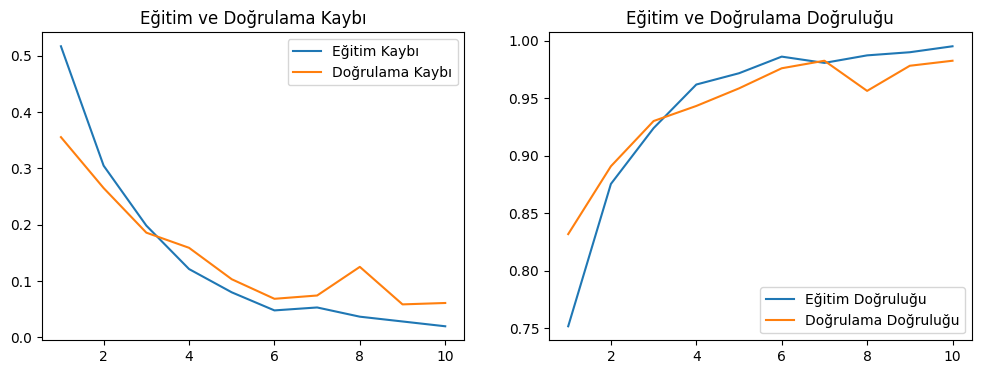

In [22]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama kayıpları
loss = history.history['loss']
val_loss = history.history['val_loss']

# Eğitim ve doğrulama doğrulukları
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Grafik çizme
epochs_range = range(1, epochs + 1)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.show()


## **Prediction**

In [26]:
# Modeli kullanma örneği
import numpy as np
from tensorflow.keras.preprocessing import image

base_path = '/content/drive/MyDrive/Colab Notebooks/Ayak-Classification-CNN'

img_path = f'{base_path}/data/feet_dataset/test/Erkek/13_1_29_10_JPG.rf.e6669342afd929a74ae9a7cc01b919f4.jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)


1/1 [==============================] - 0s 25ms/step
[[0.]]


1/1 [==============================] - 0s 17ms/step


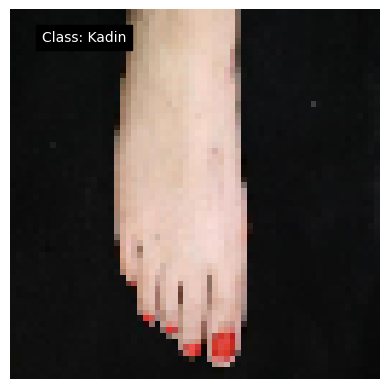

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Görüntü yolu
base_path = '/content/drive/MyDrive/Colab Notebooks/Ayak-Classification-CNN'

img_path = f'{base_path}/data/feet_dataset/test/Kadin/12_2_27_43_JPG.rf.11c301aaeceb4f621c219ebebf79a20f.jpg'

# Görüntüyü yükleme ve modelin giriş boyutuna dönüştürme
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Modelden tahminleri al
predictions = model.predict(img_array)
class_index = int(predictions[0])  # Tahmin edilen sınıf numarası

# Görüntüyü ekrana çizdirme
plt.imshow(img)
plt.axis('off')

# Sınıf etiketini görüntüye yazdırma
class_label = class_names[class_index]
plt.text(5, 5, f"Class: {class_label}", color='white', backgroundcolor='black')

# Görüntüyü gösterme
plt.show()
